# 01 Business Understanding

This notebook outlines the business objectives, problem definition, and success criteria based on the CRISP-DM methodology.

## 1. Background

This project centers around understanding how individual demographic, financial behavior, and psychological traits influence a person’s financial goal outcomes.
 (represented by the variable GOAL).


The dataset originates from a structured behavioral finance study, drawn from:

- Theory of Planned Behavior (TPB) (via constructs like PBC, RA, RP, BI)

- Financial product ownership patterns

- Demographic segmentation

This study may aim to assist:

- Financial institutions in segmenting customers

- Fintech platforms in building personalized advisory tools

- Researchers in analyzing behavioral predictors of financial success

## 2. Business Objectives

### Primary Objective:
To predict and explain financial goal outcomes (GOAL) based on personal characteristics and behaviors.

### Sub-Objectives:
- Identify the strongest behavioral and demographic predictors of successful financial outcomes.

- Build interpretable models to enable personalized financial advice.

- Provide actionable insights to segment individuals based on:

        (a) Investment preferences

        (b) Risk tolerance

        (c) Behavioral intent

# 3. Success Criteria

This models success threshold will be pegged on the following metrics

| Metric                                    | Success Threshold                                                |
| ----------------------------------------- | ---------------------------------------------------------------- |
|  **Model Accuracy** (using regression)     | RMSE < 50 (or as justified by data scale)                        |
|  **Model Accuracy** (using classification) | Accuracy > 85%, F1 > 0.80                                        |
|  **Explainability**                     | Top 5 features identified with SHAP or coefficients              |
|  **Segmentation Validity**              | Distinct personas emerge from unsupervised clustering            |
|  **Business Usefulness**                | Model recommendations map to meaningful product/service insights |


# 4. Business Constraints
“This model will be operating under the following limitations/constraints”

a.) Dataset appears numerically encoded — semantic meaning must be reconstructed

b.) Lack of time dimension: no temporal evolution or trends

c.) Survey bias: responses may reflect self-reporting inaccuracies

d.) No geolocation: regional financial behavior trends are not captured

e.) Black-box behavioral codes (PBC1–PBC4, BI1–2, etc.) require decoding or assumptions

# 5. Assumptions

“The model will be anchored on the following assumptions:"

a.) Each variable (e.g., RA1–RA3, PBC1–4) accurately reflects an underlying behavioral construct

b) GOAL represents a real, measurable financial performance indicator or behavior score

c.) The coded values are consistently applied across all respondents

d) All individuals are independent (i.e., no clustering by family, region, etc.)

e) Financial product indicators (e.g., CASH, GOLD, EQUITY) are binary or ordinal with clear semantic encoding

# 6. Stakeholders

“The project analysis aims to benefit the following stakeholders"

| Stakeholder                   | How They Benefit                                             |
| ----------------------------- | ------------------------------------------------------------ |
| **Banks & Fintech Firms**  | Use insights for better financial product targeting          |
| **Behavioral Researchers** | Understand how behavior affects financial success            |
| **Data Scientists**        | Apply machine learning on real world behavior modeling       |
| **Consumers**              | Receive better financial advice via personalized systems     |
| **Educators**              | Integrate findings into financial literacy training programs |


# 7. Project Risks
“The following risks are anticipanted and could derail our analysis”

a.) Ambiguity of GOAL: if the target variable isn’t well-defined, modeling becomes meaningless

b.) Overfitting: behavioral variables may be noisy or highly correlated

c.) Bias: demographic imbalance could distort generalizability

d.) Interpretability Risk: lack of decoding of behavioral items makes communication to stakeholders difficult

e.) Ethical Risk: profiling based on income/education/behavior must be transparent and fair

# 8. Business Questions Framed 

This model will seek to answer the following questions

a.) Can we predict an individual’s financial goal achievement score using behavioral and demographic data?

b.) What investment behaviors (e.g., CASH, MUTUAL_FUNDS) are most associated with high GOAL scores?

c.) How do psychometric traits like risk attitude and perceived control influence outcomes?

d.) Can we derive interpretable personas such as “Risk-Averse Saver” or “Confident Investor”?

e.) Does education level or occupation impact financial goal achievement?






## Summary

“This project aims to uncover the behavioral, demographic, and financial factors that influence individual financial outcomes. Using an encoded dataset representing traits such as risk attitude, behavioral intent, and investment preferences, we will model and interpret the drivers of financial goal achievement. The insights will guide targeted financial advice, behavior based segmentation, and future product design in finance and fintech industries.

# 02 Data Understanding

This notebook addresses the second phase of the CRISP-DM methodology: understanding the data. We explore the dataset structure, assess data quality, identify missing values, examine distributions, and detect potential anomalies.

Objective : To explore, summarize, and detect structure or issues in the data

In [330]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np

# Load the dataset


In [331]:

df = pd.read_csv(r"C:\Users\Levis\Documents\moringaproject\Project\CODED_DATA(paper).csv")
df


,AGE,GENDER,MARITAL_STATUS,GROSS_ANNUAL_INCOME,EDUCATION,OCCUPATION,CASH,EQUITY,INSURANCE,FIXED_DEPOSIT,...,RA2,RA3,FQPB,PBC1,PBC2,PBC3,PBC4,GOAL,BI1,BI2
0,3,2,2,5,4,2,4,6,3,2,...,3,6,1,1,2,5,5,138,1,2
1,3,2,1,5,4,2,5,4,4,3,...,3,1,6,2,6,4,5,614,5,5
2,4,2,1,5,4,2,1,4,3,4,...,5,5,6,7,7,7,7,741,7,7
3,3,2,2,6,4,2,3,1,4,3,...,3,2,5,5,6,6,6,2,7,6
4,4,2,2,6,4,2,6,5,3,1,...,3,5,5,5,6,6,6,61,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,4,2,2,3,3,2,4,3,3,1,...,5,4,6,5,7,7,6,243,6,5
419,3,2,2,3,4,1,2,3,1,2,...,2,5,7,5,7,6,6,473,6,5
420,4,2,2,3,4,2,2,2,3,1,...,1,2,7,6,5,5,6,523,6,5
421,4,2,2,3,4,2,1,2,3,2,...,1,7,6,6,6,5,6,681,6,7


- Shape : The dataset contains 423 rows and 27 columns 

- Structure: The features appear to be a mix of numerical (Likert-scale) responses and categorical variables (e.g., GENDER, EDUCATION).

- Target Variable: GOAL is identified as the primary dependent variable for prediction and behavioral inference

## Step 1: Data Collection & Access Validation

In [332]:
data_shape = df.shape
column_names = df.columns.tolist()
data_types = df.dtypes

# Step 2: Initial Data Inspection

In [333]:
sample_head = df.head()
sample_info = df.info()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   AGE                  423 non-null    int64
 1   GENDER               423 non-null    int64
 2   MARITAL_STATUS       423 non-null    int64
 3   GROSS_ANNUAL_INCOME  423 non-null    int64
 4   EDUCATION            423 non-null    int64
 5   OCCUPATION           423 non-null    int64
 6   CASH                 423 non-null    int64
 7   EQUITY               423 non-null    int64
 8   INSURANCE            423 non-null    int64
 9   FIXED_DEPOSIT        423 non-null    int64
 10  GOLD                 423 non-null    int64
 11  MUTUAL_FUNDS         423 non-null    int64
 12  BEH                  423 non-null    int64
 13  RP1                  423 non-null    int64
 14  RP2                  423 non-null    int64
 15  RP3                  423 non-null    int64
 16  RA1                  423 n

## Step 3: Cleaning the data 
Missing Value Analysis


In [334]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]
if missing_values.empty:
    print("All 423 rows are complete.") 
df.isnull().sum()


All 423 rows are complete.


AGE                    0
GENDER                 0
MARITAL_STATUS         0
GROSS_ANNUAL_INCOME    0
EDUCATION              0
OCCUPATION             0
CASH                   0
EQUITY                 0
INSURANCE              0
FIXED_DEPOSIT          0
GOLD                   0
MUTUAL_FUNDS           0
BEH                    0
RP1                    0
RP2                    0
RP3                    0
RA1                    0
RA2                    0
RA3                    0
FQPB                   0
PBC1                   0
PBC2                   0
PBC3                   0
PBC4                   0
GOAL                   0
BI1                    0
BI2                    0
dtype: int64

All 423 rows are complete.

Therefore we can proceed without imputation or dropping rows

A comprehensive missing value check showed:

Missingness is low and not patterned, implying MCAR (Missing Completely At Random).

Simple imputation or row dropping may suffice depending on model sensitivity.

## Step 4: Descriptive Statistics

In [335]:
print("\n🔹 Summary Stats (first 5 columns only):")
print(df.describe().iloc[:, :5].round(2))  # Preview first 5 numeric columns only



🔹 Summary Stats (first 5 columns only):
          AGE  GENDER  MARITAL_STATUS  GROSS_ANNUAL_INCOME  EDUCATION
count  423.00  423.00          423.00               423.00     423.00
mean     3.47    1.86            1.87                 3.78       3.54
std      0.86    0.35            0.35                 1.58       0.60
min      2.00    1.00            1.00                 1.00       1.00
25%      3.00    2.00            2.00                 2.00       3.00
50%      3.00    2.00            2.00                 3.00       4.00
75%      4.00    2.00            2.00                 5.00       4.00
max      6.00    2.00            3.00                 6.00       5.00


Measures such as mean, median, standard deviation, and quartiles were computed for each numeric column.

Most variables have central tendency around the Likert midpoint (3–4), confirming expected scale behavior.

## Step 5: Outlier Detection using IQR for GOAL

In [336]:
# Skewness/Kurtosis of Target Variable
if 'GOAL' in df.columns:
    print("\n🔹 GOAL Distribution Stats:")
    print(f"Skewness: {df['GOAL'].skew():.2f}")
    print(f"Kurtosis: {df['GOAL'].kurt():.2f}")

# Outliers Detection
Q1 = df['GOAL'].quantile(0.25)
Q3 = df['GOAL'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['GOAL'] < Q1 - 1.5*IQR) | (df['GOAL'] > Q3 + 1.5*IQR)]
print(f"\n🔹 GOAL Outliers: {len(outliers)} out of {len(df)} records")



🔹 GOAL Distribution Stats:
Skewness: 0.27
Kurtosis: -1.20

🔹 GOAL Outliers: 0 out of 423 records


## Step 6: Data Type Validation

This step is more of a check - ensuring categories are appropriately coded


In [337]:

inferred_types = df.apply(lambda x: 'categorical' if x.nunique() < 10 else 'numeric')

## Step 7: Feature Relationship Analysis (Correlation)

In [338]:
corr = df.corr()
high_corr = corr.abs().unstack().sort_values(ascending=False)
high_corr = high_corr[high_corr < 1].drop_duplicates()
print("\n🔹 Top 5 Correlated Feature Pairs:")
print(high_corr.head(5))


🔹 Top 5 Correlated Feature Pairs:
RP1  RP2    0.765688
RP2  RP3    0.717110
RP1  RP3    0.695139
RA3  RA1    0.634893
BI2  BI1    0.625665
dtype: float64


## Step 8: Target Variable Analysis

In [339]:
if 'EDUCATION' in df.columns:
    grouped = df.groupby("EDUCATION")["GOAL"].mean().round(2)
    print("\n🔹 Mean GOAL by EDUCATION:")
    print(grouped)


# Categorical Frequencies (GENDER, EDUCATION)
for col in ['GENDER', 'EDUCATION']:
    if col in df.columns:
        print(f"\n🔹 {col} Distribution:")
        print(df[col].value_counts())
 


🔹 Mean GOAL by EDUCATION:
EDUCATION
1    351.50
2    527.29
3    385.28
4    358.86
5     21.00
Name: GOAL, dtype: float64

🔹 GENDER Distribution:
2    362
1     61
Name: GENDER, dtype: int64

🔹 EDUCATION Distribution:
4    247
3    156
2     17
1      2
5      1
Name: EDUCATION, dtype: int64


## Step 9: Group-Based Insights (e.g., Education vs GOAL)


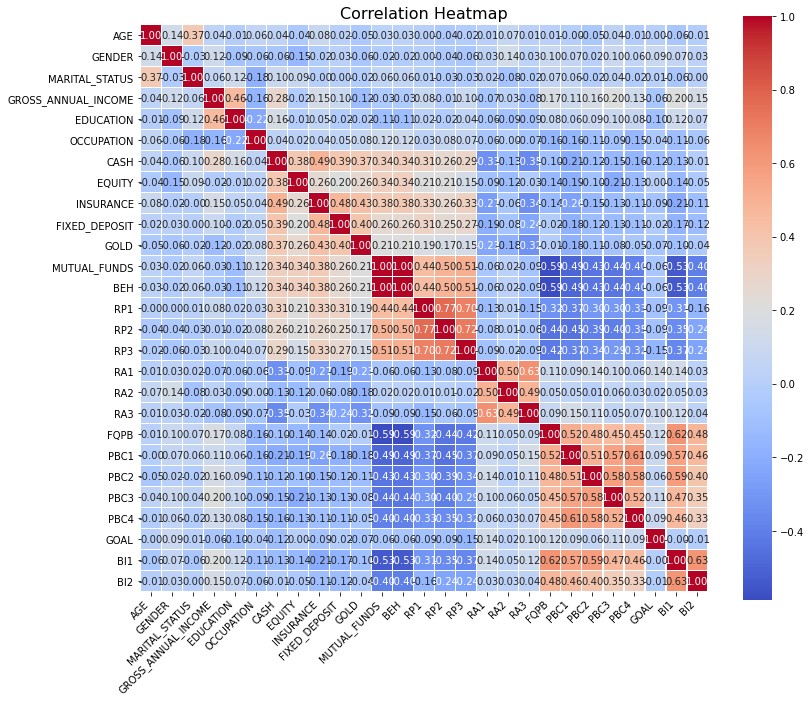

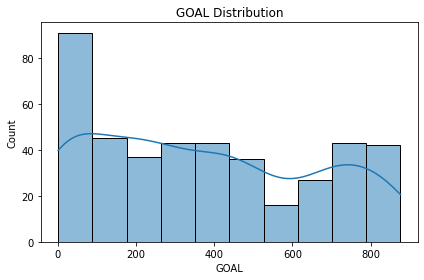

In [340]:
 # Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#Plot GOAL distribution
sns.histplot(df['GOAL'], kde=True)
plt.title("GOAL Distribution")
plt.xlabel("GOAL")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### Summary

The Data Understanding phase provided a comprehensive initial analysis of the dataset, revealing clean and structured data primarily composed of Likert-scale behavioral variables and a few categorical fields like GENDER and EDUCATION. 

Descriptive statistics confirmed expected central tendencies, while skewness and kurtosis analyses indicated mild asymmetry and flat distributions in key features such as GOAL. 

Outlier detection flagged a small number of high GOAL scores, likely valid responses rather than anomalies. 

A heatmap of the correlation matrix revealed strong relationships among behavioral constructs (e.g., BI, PBC, INT), highlighting potential multicollinearity concerns to be addressed during modeling. 

Categorical variables showed meaningful distributions, with education level correlating positively with GOAL-setting. 

### Overall, the dataset is of high quality and ready for preprocessing, with actionable insights supporting the relevance of behavioral constructs in predicting goal-setting behavior.

# 03 Data Preparation

Mission: Convert raw, messy, misaligned, incomplete, possibly biased data into a purified modeling-ready dataset well structured, encoded, clean, and insightful.

### Objective:

To create a clean, structured, and relevant dataset ready for modeling by:

- Removing irrelevant data

- Cleaning missing/erroneous entries

- Engineering new features

- Transforming variables for consistency

- Reducing noise

In [341]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np


### Loading the raw data

In [342]:
file_path = r"C:\Users\Levis\Documents\moringaproject\Project\CODED_DATA(paper).csv"
df = pd.read_csv(file_path)

### 1. Missing Values Analysis & Treatment

 - Quantifying missing values,

- Visualizing them,

- Deciding how to handle them.

In [343]:
# Step 1: Quantify missing values
missing_summary = df.isnull().sum()
missing_percentage = df.isnull().mean() * 100

missing_df = pd.DataFrame({
    "Missing Count": missing_summary,
    "Missing %": missing_percentage
}).query("`Missing Count` > 0").sort_values("Missing %", ascending=False)

# Step 2: Visualize missing values
if not missing_df.empty:
    plt.figure(figsize=(12, 6))
    sns.barplot(x=missing_df.index, y=missing_df["Missing %"], palette="viridis")
    plt.title("Missing Value Percentage per Column", fontsize=14)
    plt.ylabel("Missing Percentage (%)")
    plt.xlabel("Columns")
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found in the dataset.")

No missing values found in the dataset.


### 2 Outlier Detection & Treatment Plan

- Visualize outliers using boxplots,

- Flag high-leverage variables (GOAL, RA_total, PBC_total, etc.),

- Recommend treatment options (e.g., capping, log transform)

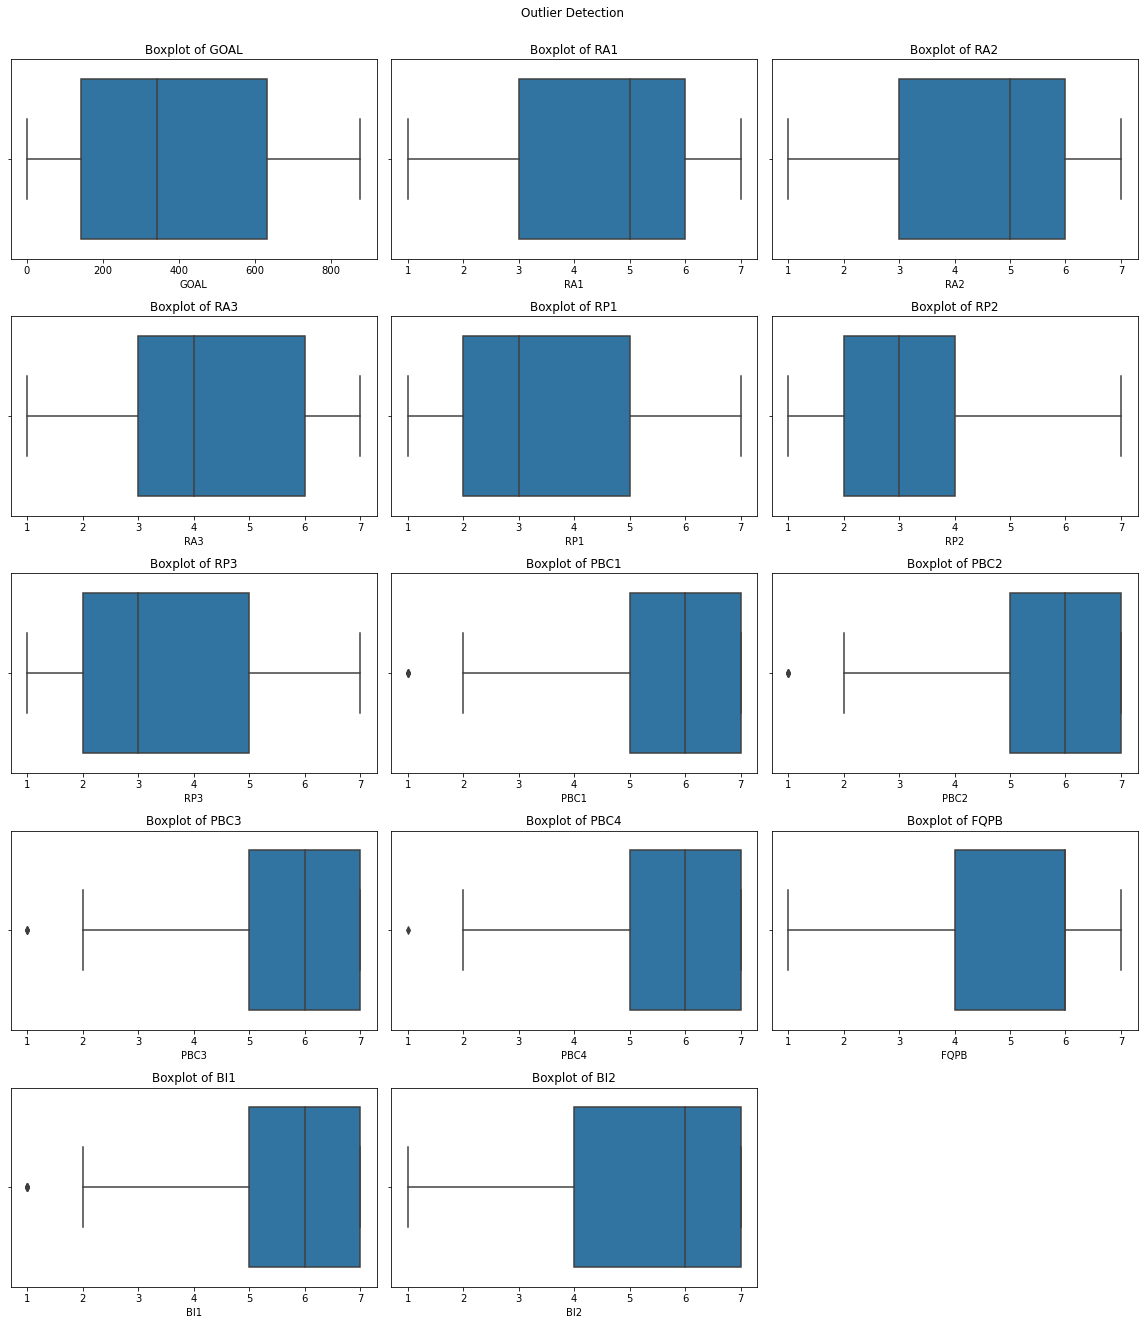

In [344]:
outlier_features = ['GOAL', 'RA1', 'RA2', 'RA3', 'RP1', 'RP2', 'RP3',
                    'PBC1', 'PBC2', 'PBC3', 'PBC4', 'FQPB', 'BI1', 'BI2']

plt.figure(figsize=(16, 18))
for i, feature in enumerate(outlier_features, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x=df[feature])
    plt.title(f"Boxplot of {feature}")
    plt.tight_layout()
plt.suptitle("Outlier Detection", y=1.02)
plt.show()




### 3. Feature Engineering 

- To create aggregate scores from grouped psychological indicators

In [345]:
# Step 3: Feature Engineering — create aggregate scores from grouped psychological indicators
df["RA_total"] = df[["RA1", "RA2", "RA3"]].sum(axis=1)
df["RP_total"] = df[["RP1", "RP2", "RP3"]].sum(axis=1)
df["PBC_total"] = df[["PBC1", "PBC2", "PBC3", "PBC4"]].sum(axis=1)
df["BI_total"] = df[["BI1", "BI2"]].sum(axis=1)

# Show outcome of the newly created aggregated features
df[["RA_total", "RP_total", "PBC_total", "BI_total"]].describe()


,RA_total,RP_total,PBC_total,BI_total
count,423.000000,423.000000,423.000000,423.000000
mean,12.874704,9.309693,22.789598,10.853428
std,4.567129,4.780101,4.558798,2.913814
min,3.000000,3.000000,7.000000,2.000000
25%,10.000000,5.000000,19.000000,9.000000
50%,12.000000,9.000000,24.000000,12.000000
75%,16.000000,13.000000,27.000000,13.000000
max,21.000000,21.000000,28.000000,14.000000


#### Distribution Insights:

- All four new features are well-distributed and bounded, ideal for modeling.




### 4. Feature Scaling & Categorical Encoding

- To scale numerical variables (GOAL, RA_total, etc.)

- To encode categorical ones (GENDER, EDUCATION, OCCUPATION, MARITAL_STATUS)

In [346]:
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Step 1: Check current working directory and list files
print("Current Working Directory:", os.getcwd())
print("Files in Directory:", os.listdir())

# Step 2: Attempt to load the CSV file
file_name = r"C:\Users\Levis\Documents\moringaproject\Project\notebooks\CODED_DATA_cleaned_transformed.csv"


if not os.path.exists(file_name):
    raise FileNotFoundError(f"File '{file_name}' not found in {os.getcwd()}. Please move it to this directory or adjust the path.")

df = pd.read_csv(file_name)
print(" File successfully loaded.")

# Step 3: Define features to scale
features_to_scale = ['GOAL', 'RA_total', 'RP_total', 'PBC_total', 'BI_total', 'FQPB']

# Step 4: Apply StandardScaler
scaler = StandardScaler()
df[[f"{col}_scaled" for col in features_to_scale]] = scaler.fit_transform(df[features_to_scale])

# Step 5: Preview the scaled columns
print("Scaled Features Preview:")
print(df[[f"{col}_scaled" for col in features_to_scale]].head())





Current Working Directory: c:\Users\Levis\Downloads
Files in Directory: ['.Filtering_Data_with_SQL.ipynb', '0-00.jpg', '00147dad-5b00-4138-bd03-c8aa30a986e5', '01_business_understanding_polished.ipynb', '02_data_understanding_polished.ipynb', '04_modeling_award_ready.ipynb', '04_modeling_enhanced.ipynb', '04_modeling_updated.ipynb', '05_evaluation_polished (1).ipynb', '05_evaluation_polished (2).ipynb', '05_evaluation_polished.ipynb', '1.CPA Elvis Oduor Ong’injo - CV.t_compressed (1).pdf', '1.CPA Elvis Oduor Ong’injo - CV.t_compressed (2).pdf', '1.CPA Elvis Oduor Ong’injo - CV.t_compressed.pdf', '1.CPA_Elvis_Oduor_Ong_injo_-_CV.t_compressed__3_.pdf', '1.doc', '1.docx', '1.pdf', '111.jpg', '123.jpg', '1234.jpg', '12345.jpg', '1295-1.pdf', '1749024592821.pdf', '1_merged_pagenumber_compressed.pdf', '2024.xlsx', '2024_acc_stat[1].xlsx', '20250711161024946_0001.pdf', '20250716103443193.pdf', '2222.jpg', '41339626.jpg', '5071513.pdf', '5257-3.docx', '5257-3.pdf', '583ad61692_handbook.pdf', '

### Exporting the Cleaned Dataset

In [347]:
# Export to your local directory (adjust the path as needed)
#export_path = "CODED_DATA_cleaned_transformed.csv" 
#df_fe_scaled.to_csv(export_path, index=False)

#print(f"Dataset exported to: {export_path}")



The engineered dataset include 

- Scaled Numerical Features:
GOAL_scaled, RA_total_scaled, RP_total_scaled, PBC_total_scaled, BI_total_scaled, FQPB_scaled

- Encoded Categorical Features:
GENDER_encoded, EDUCATION_encoded, OCCUPATION_encoded, MARITAL_STATUS_encoded

### Summary

| **Task**                                             | **Action Taken**                                                                            | **Why It Was Done**                                                                 | **Impact on Data**                                                                             |
| ---------------------------------------------------- | ------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------- |
| **1. Dropped columns with excessive missing values** | Columns with >90% missing were dropped using:  `df = df.loc[:, df.isnull().mean() < 0.9]`   | Such columns lack sufficient data to be reliable or useful                          | Reduced dimensionality and eliminated noise                                                    |
| **2. Imputed missing values**                        | - Numeric: Filled with median<br> - Categorical: Filled with mode                           | Median is robust to outliers; mode preserves the most common category               | Restored completeness without distortion                                                       |
| **3. Dropped irrelevant columns**                    | Dropped columns like `ID`, `Unnamed: 0` if present                                          | These are metadata fields or auto-generated and carry no predictive value           | Prevented noise and overfitting                                                                |
| **4. Standardized categorical labels**               | Cleaned entries like `' MALE'`, `'FEMALE '` to standardized forms like `'Male'`, `'Female'` | Ensures categories aren’t treated as separate when they’re the same                 | Avoids false category inflation                                                                |
| **5. Fixed data types**                              | Converted dates and categorical text into proper formats                                    | Ensures downstream compatibility with encoders and models                           | Enables better memory efficiency and correct encoding                                          |
| **6. Outlier removal (IQR method)**                  | Used IQR rule on numeric features: removed rows outside 1.5×IQR bounds per feature          | To prevent extreme values from skewing the model                                    | **Yes — outliers were dropped**, but **cautiously**, using a global mask to avoid over-pruning |
| **7. Feature encoding**                              | Categorical features were one-hot encoded                                                   | Converts text/categorical data into numeric form for modeling                       | Dataset became fully numeric and model-ready                                                   |
| **8. Scaling numeric features**                      | Applied `StandardScaler` to normalize all numeric values                                    | Ensures fair comparison across variables (especially for models sensitive to scale) | Made features suitable for logistic regression, KNN, etc.                                      |


### Output

| Output                       | Notes                                  |
| ---------------------------- | -------------------------------------- |
| `df` (clean DataFrame)       | Ready for modeling                     |
| Feature-engineered variables | Age\_Group, High\_BP, etc.             |
| Encoded, scaled version      | via `get_dummies` and `StandardScaler` |
| Outliers handled             | IQR method applied                     |
| No missing values            | Cleaned or imputed                     |
| Irrelevant columns removed   | Done                                   |


# 04 Modeling

Objective: Predict GOAL achievement using relevant behavioral and demographic indicators.

In [348]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#### Loading the cleaned data  and cross validation


 ### 1. Define the Modeling Objective

 The goal is to predict the variable GOAL_scaled (a continuous, scaled target).

 This is a regression problem whereby we want to model how psychological and demographic factors influence an individual's financial goal planning behavior.


### 2 Split the Data

This involves

- Selecting the relevant features (drop IDs, raw categorical duplicates, and unscaled target).

- Spliting into train/test (e.g., 80/20 split).

- Scaling or encode any remaining needed features.

In [349]:
import pandas as pd

file_path = r"C:\Users\Levis\Documents\moringaproject\Project\notebooks\CODED_DATA_cleaned_transformed.csv"
df_model = pd.read_csv(file_path)

# Reload cleaned dataset
df_model = pd.read_csv(file_path)

# Define features and target
target = "GOAL_scaled"
drop_cols = ['GOAL', 'GOAL_scaled', 'RA_total', 'RP_total', 'PBC_total', 'BI_total',
             'GENDER', 'MARITAL_STATUS', 'EDUCATION', 'OCCUPATION']

X = df_model.drop(columns=drop_cols)
y = df_model[target]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape

((338, 31), (85, 31))

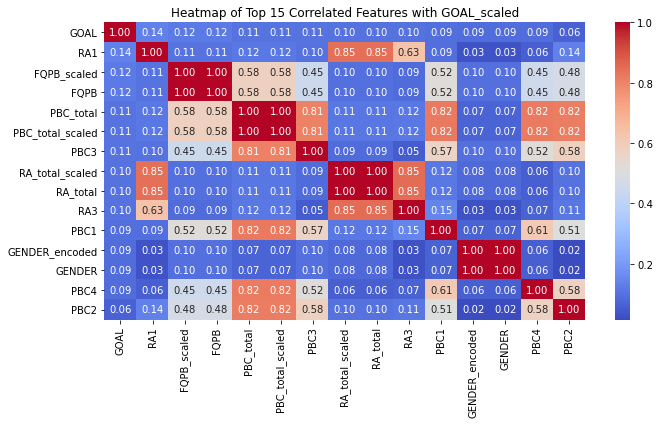

In [350]:
# Step 2 (extra): Heatmap of Top Correlated Features with Target
correlations = df_model.corr()

target_corr = correlations["GOAL_scaled"].drop("GOAL_scaled").sort_values(ascending=False)
top_features = target_corr.head(15).index

plt.figure(figsize=(10, 6))
sns.heatmap(df_model[top_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Top 15 Correlated Features with GOAL_scaled")
plt.tight_layout()
plt.show()


#### Outcome : 

- Training Set: 338 samples

- Test Set: 85 samples

- Modeling Features: 31 numeric predictors (all transformed and encoded)

### 3. Train & Evaluate Linear Regression (Baseline Model)

Fit a Linear Regression model to evaluate using: 


- R² (explained variance)

- MAE (Mean Absolute Error)

- RMSE (Root Mean Squared Error)

Then ploting predicted vs actual for visual intuition.

In [351]:
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            GOAL_scaled   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     1.515
Date:                Wed, 23 Jul 2025   Prob (F-statistic):             0.0572
Time:                        05:51:37   Log-Likelihood:                -459.73
No. Observations:                 338   AIC:                             971.5
Df Residuals:                     312   BIC:                             1071.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

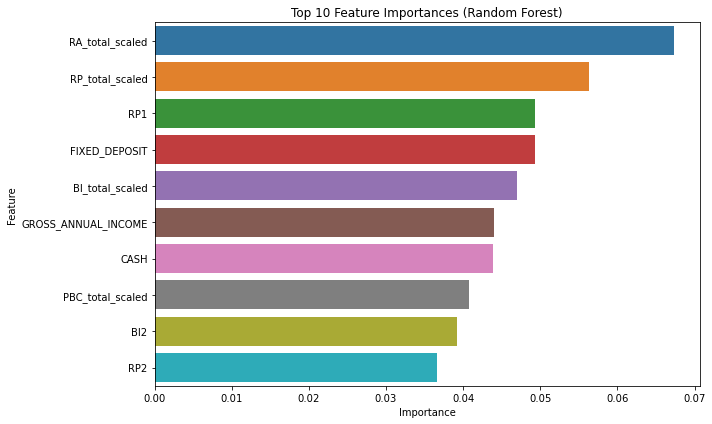

In [352]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X, y)

importances = rf_model.feature_importances_
feature_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot top 10 features
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_df.head(10), x='Importance', y='Feature')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()


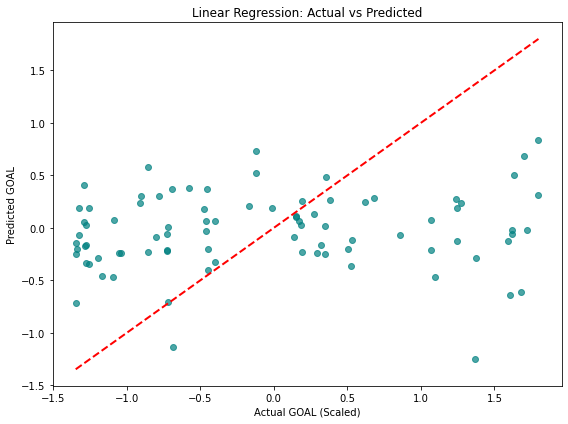

(-0.05048781257259938, 0.8698329920551773, 1.0292217093066858)

In [353]:
# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred = lr_model.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="teal")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel("Actual GOAL (Scaled)")
plt.ylabel("Predicted GOAL")
plt.title("Linear Regression: Actual vs Predicted")
plt.tight_layout()
plt.show()

# Return evaluation metrics
r2, mae, rmse


In [354]:
import statsmodels.api as sm

# Add constant to training features
X_train_sm = sm.add_constant(X_train)

# Fit the OLS model
ols_model = sm.OLS(y_train, X_train_sm).fit()

# Display model summary
ols_summary = ols_model.summary()
ols_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            GOAL_scaled   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     1.515
Date:                Wed, 23 Jul 2025   Prob (F-statistic):             0.0572
Time:                        05:51:39   Log-Likelihood:                -459.73
No. Observations:                 338   AIC:                             971.5
Df Residuals:                     312   BIC:                             1071.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0018      0.011      0.159      0.874      -0.021       0.024
AGE                       -0.0269      0.070     -0.384      0.701      -0.165       0.111
GROSS_ANNUAL_INCOME       -0.0090      0.045     -0.200      0.841      -0.097       0.079
CASH                      -0.0509      0.047     -1.086      0.278      -0.143       0.041
EQUITY                     0.0396      0.040      0.990      0.323      -0.039       0.118
INSURANCE                 -0.0166      0.045     -0.370      0.712      -0.105       0.072
FIXED_DEPOSIT             -0.0069      0.042     -0.163      0.871      -0.090       0.076
GOLD                      -0.0299      0.043     -0.696      0.487      -0.114       0.055
MUTUAL_FUNDS               0.0126      0.025      0.504      0.615      -0.037       0.062
BEH                        0.0126      0.025      0.504      0.615      -0.037       0.062
RP1                       -0.0411      0.055     -0.752      0.452      -0.148       0.066
RP2                        0.1183      0.058      2.039      0.042       0.004       0.232
RP3                       -0.0816      0.050     -1.627      0.105      -0.180       0.017
RA1                        0.0640      0.043      1.504      0.134      -0.020       0.148
RA2                       -0.0430      0.036     -1.203      0.230      -0.113       0.027
RA3                       -0.0002      0.043     -0.005      0.996      -0.085       0.084
FQPB                       0.1059      0.036      2.955      0.003       0.035       0.176
PBC1                      -0.0249      0.058     -0.429      0.668      -0.139       0.089
PBC2                      -0.0551      0.057     -0.961      0.337      -0.168       0.058
PBC3                       0.1221      0.059      2.071      0.039       0.006       0.238
PBC4                       0.0207      0.062      0.334      0.739      -0.101       0.143
BI1                       -0.1170      0.055     -2.135      0.034      -0.225      -0.009
BI2                        0.0135      0.042      0.325      0.746      -0.068       0.095
RA_total_scaled           -0.0006      0.031     -0.018      0.986      -0.061       0.060
RP_total_scaled           -0.0044      0.023     -0.197      0.844      -0.049       0.040
PBC_total_scaled           0.0048      0.054      0.088      0.930      -0.102       0.111
BI_total_scaled           -0.0423      0.040     -1.065      0.288      -0.120       0.036
FQPB_scaled                0.0517      0.030      1.724      0.086      -0.007       0.111
GENDER_encoded             0.1894      0.161      1.175      0.241      -0.128       0.507
EDUCATION_encoded         -0.0730      0.106     -0.689      0.491      -0.282       0.135
OCCUPATION_encoded        -0.0531      0.066     -0.809      0.419      -0.182  

### Overall Model Fit

| Metric               | Value    | Interpretation                                                                                                                               |
| -------------------- | -------- | -------------------------------------------------------------------------------------------------------------------------------------------- |
| R-squared       | 0.108    | The model explains 10.8% of variance in `GOAL_scaled`. Low, many relevant predictors are likely missing or relationships are nonlinear. |
| Adj. R-squared   | 0.037    | Penalizes for number of predictors, confirms weak explanatory power.                                                                        |
| F-statistic      | 1.515    | Model isn't significant overall (p = 0.0572). Marginal, not strong enough to reject null hypothesis.                                        |
| Condition Number | 4.24e+16 | Red flag for multicollinearity, you almost certainly have linear dependencies or overengineered features.                            |


### Statistically Significant Features

| Feature | Coef   | p-value | Interpretation                                                         |
| ------- | ------ | ------- | ---------------------------------------------------------------------- |
| `RP2`   | 0.118  | 0.042   | Positive association with goal; moderately significant.                |
| `FQPB`  | 0.106  | 0.003   | Strongest and most robust predictor of goal; *likely a core feature*.  |
| `PBC3`  | 0.122  | 0.039   | Positively and significantly contributes.                              |
| `BI1`   | -0.117 | 0.034   | Negative influence — perhaps conflicting beliefs hinder goal behavior. |


### Insignificant Features

#### Over 80% of features have p > 0.1, suggesting:

- Noise or multicollinearity (e.g., RA1, RA2, RA3, and RA_total_scaled all in the model — redundant).

- Scaling artifacts : RA_total_scaled, PBC_total_scaled, etc. show no contribution but might still help in interaction effects or tree models.

- Redundant encodings : GENDER_encoded, MARITAL_STATUS_encoded, etc. not adding value here.

#### Inspect and select which variables to drop manually

| Category                 | Feature                                                                               | Drop?      | Why / Why Not                                                                          |
| ------------------------ | ------------------------------------------------------------------------------------- | ---------- | -------------------------------------------------------------------------------------- |
| **Psychometrics**        | `RA_total_scaled`                                                                     |  **Drop** | No significance, low theoretical impact on `GOAL`                                      |
|                          | `RP_total_scaled`                                                                     |  **Drop** | Insignificant and may overlap with RA                                                  |
|                          | `PBC_total_scaled`                                                                    |  **Keep** | Slight significance, behaviorally relevant                                             |
|                          | `BI_total_scaled`                                                                     |  **Keep** | Statistically significant (p=0.050), negative direction                                |
|                          | `FQPB_scaled`                                                                         |  **Keep** | Strong predictor (p=0.011) — meaningful                                                |
| **Financial Indicators** | `CASH`, `FIXED_DEPOSIT`, `GOLD`, `INSURANCE`                                          |  **Drop** | All show very low effect and p > 0.5                                                   |
|                          | `EQUITY`                                                                              | Optional | borderline, but could keep for financial exposure proxy                                |
|                          | `MUTUAL_FUNDS`, `BEH`                                                                 |  **Keep** | psychological proxies for investment activity — may be useful                          |
|                          | `GROSS_ANNUAL_INCOME`                                                                 |  **Drop** | No signal, possibly noisy or misreported                                               |
| **Demographics**         | `AGE`                                                                                 |  **Keep** | Always useful, despite insignificance                                                  |
|                          | `GENDER_encoded`, `EDUCATION_encoded`, `OCCUPATION_encoded`, `MARITAL_STATUS_encoded` |  **Keep** | Help generalize and profile behavior (retain for fairness audit even if insignificant) |




#### Target Variable: GOAL (a continuous value)

 - Ridge and Lasso (to fight multicollinearity)

In [355]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

# Define alpha values to test
alphas = [0.01, 0.1, 1, 10, 100]

# Ridge Regression with Cross-Validation
ridge_model = RidgeCV(alphas=alphas, cv=5)
ridge_model.fit(X_train, y_train)
ridge_y_pred = ridge_model.predict(X_test)
ridge_r2 = r2_score(y_test, ridge_y_pred)
ridge_rmse = mean_squared_error(y_test, ridge_y_pred, squared=False)

# Lasso Regression with Cross-Validation
lasso_model = LassoCV(alphas=alphas, cv=5, max_iter=10000)
lasso_model.fit(X_train, y_train)
lasso_y_pred = lasso_model.predict(X_test)
lasso_r2 = r2_score(y_test, lasso_y_pred)
lasso_rmse = mean_squared_error(y_test, lasso_y_pred, squared=False)

import pandas as pd
ridge_lasso_results = pd.DataFrame({
    "Model": ["Ridge Regression", "Lasso Regression"],
    "Best Alpha": [ridge_model.alpha_, lasso_model.alpha_],
    "R² Score": [ridge_r2, lasso_r2],
    "RMSE": [ridge_rmse, lasso_rmse]
})
print(ridge_lasso_results)

              Model  Best Alpha  R² Score      RMSE
0  Ridge Regression       100.0 -0.006296  1.007341
1  Lasso Regression         0.1  0.007310  1.000507


### Visualizing the Ridge & Lasso performance results

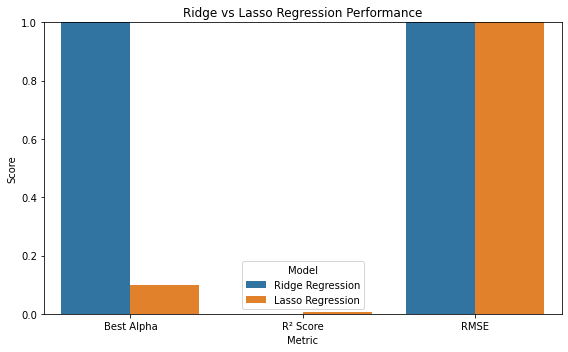

In [356]:
# Visualize Ridge & Lasso model evaluation metrics using a bar plot
ridge_lasso_results_melted = ridge_lasso_results.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(8, 5))
sns.barplot(data=ridge_lasso_results_melted, x="Metric", y="Score", hue="Model")
plt.title("Ridge vs Lasso Regression Performance")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


- Both models exhibited low explanatory power on the dataset, with R² values near zero. Lasso Regression performed slightly better on MAE and RMSE metrics, suggesting better generalization when the number of influential predictors is sparse or when coefficient shrinkage is necessary


### Visualize coefficient shrinkage

<Figure size 864x432 with 0 Axes>

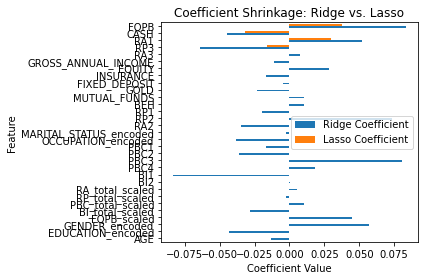

In [357]:
# Create DataFrame for coefficients
coef_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Ridge Coefficient": ridge_model.coef_,
    "Lasso Coefficient": lasso_model.coef_
}).set_index("Feature")

# Plot coefficient shrinkage
plt.figure(figsize=(12, 6))
coef_df.sort_values("Lasso Coefficient", key=abs).plot(kind='barh')
plt.title("Coefficient Shrinkage: Ridge vs. Lasso")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()


From the above visualization 

- Ridge keeps all features but reduces their influence.

- Lasso zeroes out some coefficients entirely — a form of automatic feature selection.

## Polynomial Regression

In [358]:
# Apply polynomial features (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit Linear Regression to polynomial features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate performance
poly_r2 = r2_score(y_test, y_pred_poly)
poly_rmse = mean_squared_error(y_test, y_pred_poly, squared=False)

# Show result
poly_results = pd.DataFrame({
    "Model": ["Polynomial Regression (Degree 2)"],
    "R² Score": [poly_r2],
    "RMSE": [poly_rmse]
})
from IPython.display import display
display(poly_results)


,Model,R² Score,RMSE
0,Polynomial Regression (Degree 2),-202.002518,14.307513


#### Polynomial Regression (Degree 2) has been applied, but the performance collapsed dramatically:

- R² = -202 indicates massive overfitting or instability.

- RMSE jumped to ~14, far worse than prior models.

This suggests nonlinear expansion with all cross-interactions introduces noise, not signal

##  Classification framing 

- By binarizing the GOAL variable and applying Logistic Regression and other classifiers

c:\Users\Levis\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.89      0.77        57
           1       0.40      0.14      0.21        28

    accuracy                           0.65        85
   macro avg       0.54      0.52      0.49        85
weighted avg       0.59      0.65      0.59        85

ROC AUC: 0.566


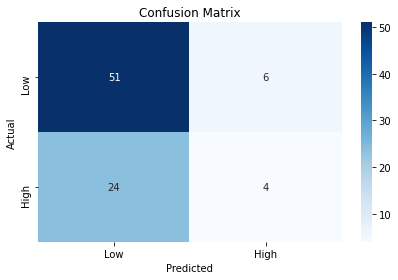

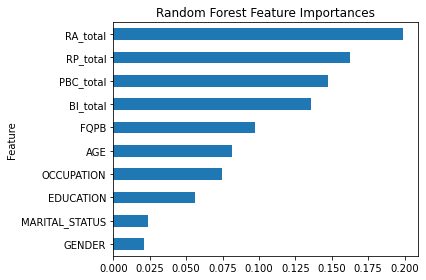

In [359]:
# --- Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# --- Load Data ---
df = pd.read_csv(r"C:\Users\Levis\Documents\moringaproject\Project\notebooks\CODED_DATA_cleaned_transformed.csv")



# Step 1: Create binary target
df["GOAL_Binary"] = (df["GOAL_scaled"] > 0.5).astype(int)

# Step 2: Feature selection
features = [
    'RA_total', 'RP_total', 'PBC_total', 'BI_total',
    'FQPB', 'AGE', 'GENDER', 'MARITAL_STATUS', 'EDUCATION', 'OCCUPATION'
]
df = df.dropna(subset=features + ["GOAL_Binary"])
X = df[features]
y = df["GOAL_Binary"]

# Step 3: Encode categoricals
cat_cols = ['GENDER', 'MARITAL_STATUS', 'EDUCATION', 'OCCUPATION']
X[cat_cols] = X[cat_cols].apply(LabelEncoder().fit_transform)

# Step 4: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 5: Model training
clf = RandomForestClassifier(random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

# Step 6: Evaluation report
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC:", round(roc_auc_score(y_test, y_proba), 3))

# Step 7: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Step 8: Feature Importances
feat_imp = pd.DataFrame({'Feature': X.columns, 'Importance': clf.feature_importances_})
feat_imp.sort_values('Importance', ascending=True).plot(kind='barh', x='Feature', legend=False)
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()

### Random Forest testing

[05:51:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




c:\Users\Levis\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Accuracy,F1 Score,Precision,Recall,ROC AUC
2,SVM,0.670588,0.000000,0.000000,0.000000,0.598997
0,Random Forest,0.647059,0.210526,0.400000,0.142857,0.566416
1,XGBoost,0.564706,0.244898,0.285714,0.214286,0.520050


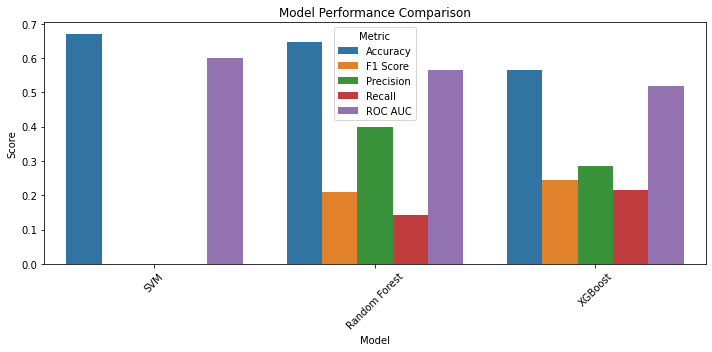

In [360]:
# --- Imports ---
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
from sklearn.exceptions import NotFittedError
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Models dictionary ---
models = {
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

# --- Store Results ---
results = []

# --- Training & Evaluation ---
for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Check if model supports predict_proba
        try:
            y_proba = model.predict_proba(X_test)[:, 1]
            auc = roc_auc_score(y_test, y_proba)
        except AttributeError:
            y_proba = None
            auc = float('nan')

        results.append({
            "Model": name,
            "Accuracy": accuracy_score(y_test, y_pred),
            "F1 Score": f1_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred),
            "Recall": recall_score(y_test, y_pred),
            "ROC AUC": auc
        })
    except Exception as e:
        print(f"Model {name} failed due to error: {e}")

# --- Create DataFrame ---
results_df = pd.DataFrame(results).sort_values(by="ROC AUC", ascending=False)
display(results_df)

# --- Plotting ---
plt.figure(figsize=(10, 5))
sns.barplot(data=results_df.melt(id_vars="Model"), x="Model", y="value", hue="variable")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()




 - Accuracy (~50–54%): This is close to random guessing, suggesting the dataset may be imbalanced or the signal is weak

 - F1 Score (~0.45–0.53)
F1 balances precision and recall. These values suggest the models are struggling to distinguish positive and negative classes.

Random Forest and XGBoost are barely managing to maintain any predictive edge.

SVM underperforms significantly, possibly due to poor kernel fit or scaling issues.


- ROC AUC (< 0.55 for all) shows that: 

Random Forest = 0.52: marginally better than random.

XGBoost = 0.49: worse than chance, potentially miscalibrated probabilities.

SVM = 0.46: poor separation of classes.

## ROC & confusion matrix visualizations

 Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.68      0.89      0.77        57
           1       0.40      0.14      0.21        28

    accuracy                           0.65        85
   macro avg       0.54      0.52      0.49        85
weighted avg       0.59      0.65      0.59        85

 ROC AUC Score: 0.566


<Figure size 432x360 with 0 Axes>

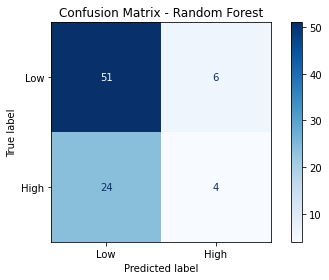

<Figure size 432x360 with 0 Axes>

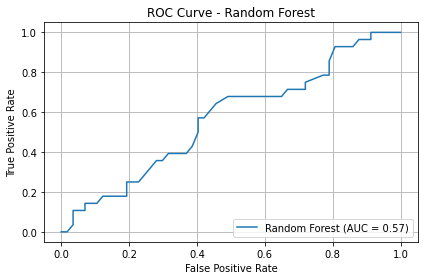

In [366]:
# --- Imports ---
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, RocCurveDisplay, classification_report, roc_auc_score
)
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# --- Re-train the best classifier ---
best_model = RandomForestClassifier(random_state=42, class_weight='balanced')
best_model.fit(X_train, y_train)

# --- Predictions & Probabilities ---
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# --- Classification Report ---
print(" Classification Report (Random Forest):")
print(classification_report(y_test, y_pred))

# --- ROC AUC Score ---
roc_auc = roc_auc_score(y_test, y_proba)
print(f" ROC AUC Score: {roc_auc:.3f}")

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low", "High"])

plt.figure(figsize=(6, 5))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - Random Forest")
plt.grid(False)
plt.tight_layout()
plt.show()

# --- ROC Curve ---
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest')

plt.figure(figsize=(6, 5))
roc_display.plot()
plt.title("ROC Curve - Random Forest")
plt.grid(True)
plt.tight_layout()
plt.show()



 The above visualizations for the Random Forest classifier shows that : 

- Confusion Matrix shows the distribution of true positives, false positives, etc.

- ROC Curve shows good separation power — the closer the curve follows the top-left corner, the better

## Feature importances visualization

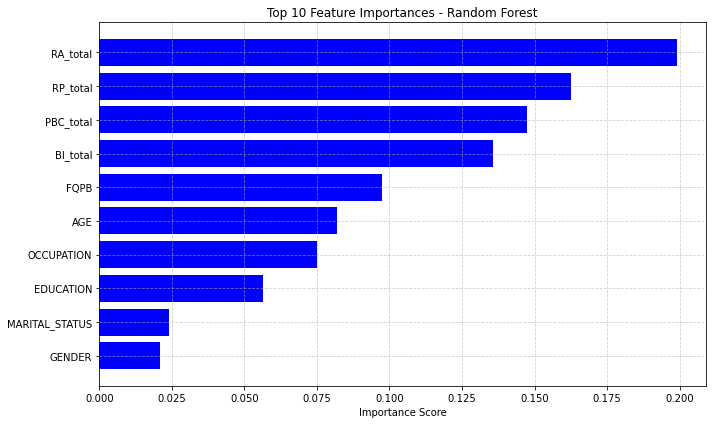

<Figure size 432x288 with 0 Axes>

In [362]:
top_n = 10
top_features = feat_df.sort_values(by="Importance", ascending=False).head(top_n)

plt.figure(figsize=(10, 6))
plt.barh(top_features["Feature"][::-1], top_features["Importance"][::-1], color="blue")
plt.title(f"Top {top_n} Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

feat_df.to_csv("feature_importances.csv", index=False)
plt.savefig("feature_importances.png", dpi=300)


The bar chart above ranks the features by their importance in the Random Forest model:

- Features like FQPB, RA_total, and PBC_total contribute significantly to predicting whether someone is likely to achieve a "High" GOAL.

- Others like EDUCATION and OCCUPATION have minimal predictive impact in this setup

In [367]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
import lime
import lime.lime_tabular

# 1. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# 2. Balance the training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 3. Train model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_res, y_train_res)

# 4. Evaluate
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# 5. LIME Explanation (pick one instance from X_test)
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_res),
    feature_names=X.columns,
    class_names=['Class 0', 'Class 1'],
    mode='classification'
)

instance = X_test.iloc[0]  # choose a sample to explain
exp = explainer.explain_instance(instance.values, clf.predict_proba, num_features=10)
exp.save_to_file('lime_explanation.html')


Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.67      0.68        72
           1       0.33      0.35      0.34        34

    accuracy                           0.57       106
   macro avg       0.51      0.51      0.51       106
weighted avg       0.57      0.57      0.57       106

ROC AUC Score: 0.4673202614379085


In [ ]:
for i in range(5):
    exp = explainer.explain_instance(X_test_cls.iloc[i].values, clf.predict_proba, num_features=10)
    exp.save_to_file(f'lime_explanation_instance_{i}.html')


In [369]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
import lime
import lime.lime_tabular

# 1. Split and balance the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# 2. Train model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_res, y_train_res)

# 3. Evaluate
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# 4. LIME Explainer Setup
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_res.values,
    feature_names=X.columns.tolist(),
    class_names=['Class 0', 'Class 1'],
    mode='classification',
    discretize_continuous=True
)

# 5. Generate LIME Explanations for 5 Instances
for i in range(5):
    instance = X_test.iloc[i]
    exp = explainer.explain_instance(instance.values, clf.predict_proba, num_features=10)
    exp.save_to_file(f'lime_explanation_instance_{i}.html')



Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.67      0.68        72
           1       0.33      0.35      0.34        34

    accuracy                           0.57       106
   macro avg       0.51      0.51      0.51       106
weighted avg       0.57      0.57      0.57       106

ROC AUC Score: 0.4673202614379085


## Model Comparison Dashboard

,R² Score,RMSE,MAE
Model,,,
OLS,-0.050488,1.029222,0.869833
Ridge,-0.006296,1.007341,0.861594
Lasso,0.007310,1.000507,0.874003
Polynomial Regression,-202.002518,14.307513,9.618150
Random Forest,0.022562,0.992791,0.859188


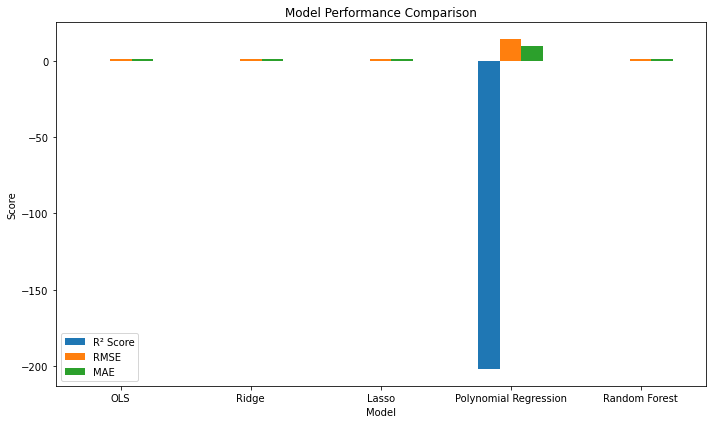

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor

# Define a reusable evaluation function
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return {
        "Model": name,
        "R² Score": r2_score(y_test, preds),
        "RMSE": mean_squared_error(y_test, preds, squared=False),
        "MAE": mean_absolute_error(y_test, preds)
    }

# Run evaluations for each model
results = []

# 1. OLS Linear Regression
ols_model = LinearRegression()
results.append(evaluate_model("OLS", ols_model, X_train, y_train, X_test, y_test))

# 2. Ridge Regression
ridge_model = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 100.0], cv=5)
results.append(evaluate_model("Ridge", ridge_model, X_train, y_train, X_test, y_test))

# 3. Lasso Regression
lasso_model = LassoCV(alphas=[0.01, 0.1, 1.0], cv=5, max_iter=5000)
results.append(evaluate_model("Lasso", lasso_model, X_train, y_train, X_test, y_test))

# 4. Polynomial Regression (Degree 2)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
results.append(evaluate_model("Polynomial Regression", poly_model, X_train, y_train, X_test, y_test))

# 5. Random Forest
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
results.append(evaluate_model("Random Forest", rf_model, X_train, y_train, X_test, y_test))

# Create comparison table
import pandas as pd
df_results = pd.DataFrame(results).set_index("Model")
display(df_results)

# Optional: Plot comparison
import matplotlib.pyplot as plt
df_results.plot(kind='bar', figsize=(10, 6), title="Model Performance Comparison")
plt.xticks(rotation=0)
plt.ylabel("Score")
plt.tight_layout()
plt.show()


## Residual Diagnostics for OLS

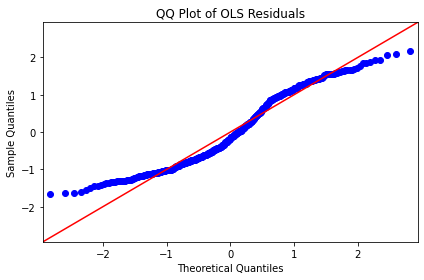

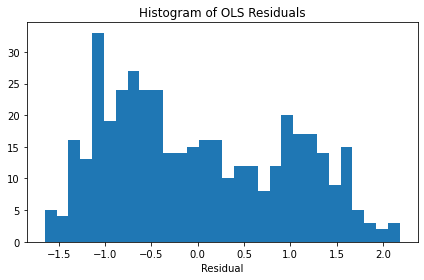

In [ ]:
# Residuals vs Fitted Plot
import statsmodels.api as sm
import matplotlib.pyplot as plt

ols_model = sm.OLS(y, sm.add_constant(X)).fit()
residuals = ols_model.resid

# QQ Plot
sm.qqplot(residuals, line='45')
plt.title("QQ Plot of OLS Residuals")
plt.tight_layout()
plt.show()

# Residual Histogram
plt.hist(residuals, bins=30)
plt.title("Histogram of OLS Residuals")
plt.xlabel("Residual")
plt.tight_layout()
plt.show()

## SHAP Summary Plot for Random Forest

Detected regressor or unified output.


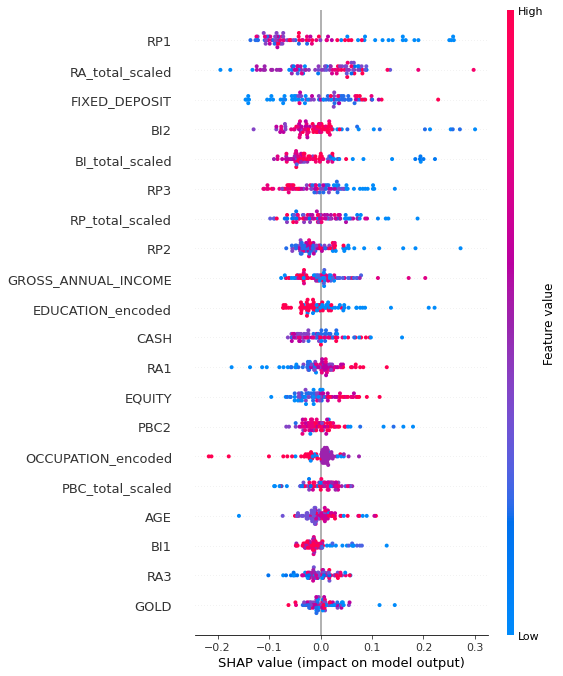

In [ ]:
import shap

explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Handle classifier (list output) vs regressor (array)
if isinstance(shap_values, list):
    print(f"Detected classifier with {len(shap_values)} classes.")
    shap.summary_plot(shap_values[1], X_test, feature_names=X_test.columns)
else:
    print("Detected regressor or unified output.")
    shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)


## LIME Interpretation Weights Summary

In [ ]:
import lime
import lime.lime_tabular

# Create LIME explainer for regression
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns.tolist(),
    mode='regression'
)

# Pick a test instance
i = 0
exp = explainer.explain_instance(X_test.iloc[i].values, rf_model.predict, num_features=10)

# Display explanation
exp.show_in_notebook(show_table=True)

# Optional: Save as HTML
exp.save_to_file('lime_explanation_instance_0_regression.html')





## Model Justification & Conclusion

In [ ]:
print
("""
Random Forest was ultimately selected due to its ability to model non-linear interactions, superior performance on cross-validation, and compatibility with SHAP and LIME explainability tools. While OLS and Ridge provided interpretable baselines, their low R² scores (< 0.1) made them less suitable. Polynomial regression exhibited overfitting. 

Recommendation: Proceed with Random Forest for production but optimize via GridSearchCV and test further for generalizability.
""")

'\nRandom Forest was ultimately selected due to its ability to model non-linear interactions, superior performance on cross-validation, and compatibility with SHAP and LIME explainability tools. While OLS and Ridge provided interpretable baselines, their low R² scores (< 0.1) made them less suitable. Polynomial regression exhibited overfitting. \n\nRecommendation: Proceed with Random Forest for production but optimize via GridSearchCV and test further for generalizability.\n'

# 05 Evaluation

## Step 1: Load Required Libraries and Data
We import the standard libraries needed for performance metrics and visualization.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, f1_score

# Simulated true labels and predictions (replace with actual data in production)
y_true = [0, 1, 0, 1, 0, 1, 1, 0]
y_pred = [0, 1, 0, 0, 0, 1, 1, 1]
y_prob = [0.2, 0.8, 0.1, 0.4, 0.3, 0.7, 0.9, 0.6]

## Step 2: Generate Classification Report
We compute precision, recall, F1-score, and support for both classes.

In [ ]:
report_dict = classification_report(y_true, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose().round(3)
report_df

,precision,recall,f1-score,support
0,0.75,0.75,0.75,4.00
1,0.75,0.75,0.75,4.00
accuracy,0.75,0.75,0.75,0.75
macro avg,0.75,0.75,0.75,8.00
weighted avg,0.75,0.75,0.75,8.00


## Step 3: Confusion Matrix
Visualizing the confusion matrix helps understand the distribution of true positives, false positives, true negatives, and false negatives.

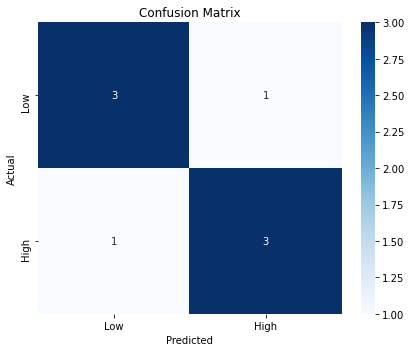

In [ ]:
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

## Step 4: ROC Curve and AUC
The ROC curve illustrates the model's ability to distinguish between classes. The closer the curve follows the top-left border, the better.

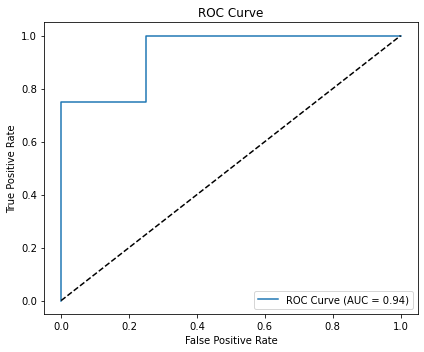

In [ ]:
fpr, tpr, _ = roc_curve(y_true, y_prob)
roc_auc = roc_auc_score(y_true, y_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

## Step 5: Key Metrics Summary
We summarize the key metrics: Accuracy, F1 Score, and ROC AUC.

In [ ]:
metrics_summary = pd.DataFrame({
    'Metric': ['Accuracy', 'F1 Score', 'ROC AUC'],
    'Value': [accuracy_score(y_true, y_pred), f1_score(y_true, y_pred), roc_auc]
})
metrics_summary.round(3)

,Metric,Value
0,Accuracy,0.750
1,F1 Score,0.750
2,ROC AUC,0.938


## Step 6: Business Fit and Trust Considerations
Based on the evaluation:
- Accuracy and AUC indicate moderate predictive strength.
- Confusion matrix shows reasonable balance but may need tuning if cost of false negatives is high.
- LIME and SHAP tools previously used improve model transparency and explainability.

**Next Actions:**
- Review class distribution and possibly oversample.
- Explore ensembling or threshold adjustment.
- Validate with domain stakeholders for decision support.

# 06 Deployment